## SCC

In [14]:
import scanpy as sc
adata_ST1=sc.read_h5ad('/home/qyyuan/project/ST_GRN/TESLA/tutorial/results/enhanced_exp.h5ad')
adata_ST_Ori=sc.read('/home/qyyuan/project/ST_GRN/data/SCC/adata_SCC_ST.h5ad')

/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
points1=adata_ST_Ori.obs[['pixel_x','pixel_y']].to_numpy()
df=adata_ST_Ori.obs[['pixel_x','pixel_y']]

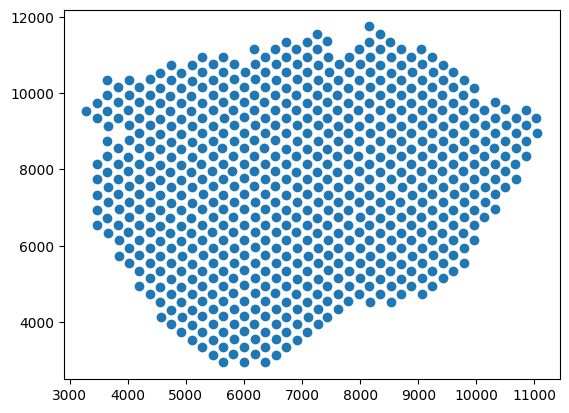

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['pixel_x'], df['pixel_y'])
plt.show()

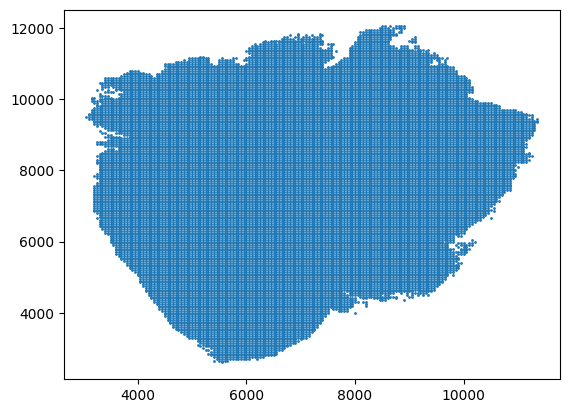

In [21]:
points2=adata_ST1.obs[['y','x']].to_numpy()
df=adata_ST1.obs[['x','y']]
import matplotlib.pyplot as plt
plt.scatter(df['y'], df['x'], s=1)
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def find_nearest_rows_vectorized(points1, points2):
    """
    向量化版本的最近邻搜索，效率更高
    """
    if points1.shape[1] != 2 or points2.shape[1] != 2:
        raise ValueError("两个矩阵都必须是N*2的形状")
    # 使用广播计算所有点对之间的距离
    # 扩展维度以便广播计算
    points1_expanded = points1[:, np.newaxis, :]  # 形状: (N, 1, 2)
    points2_expanded = points2[np.newaxis, :, :]  # 形状: (1, M, 2)
    # 计算平方距离（避免开方计算，因为argmin结果相同）
    squared_distances = np.sum((points1_expanded - points2_expanded) ** 2, axis=2)  
    # 找到每个点在points2中的最近邻索引
    nearest_indices = np.argmin(squared_distances, axis=1)
    # 计算最小距离
    nearest_distances = np.sqrt(np.min(squared_distances, axis=1))
    return nearest_indices, nearest_distances

# 示例数据

# 调用函数获取最近邻和最近距离
nearest_indices, nearest_distances = find_nearest_rows_vectorized(points1, points2)



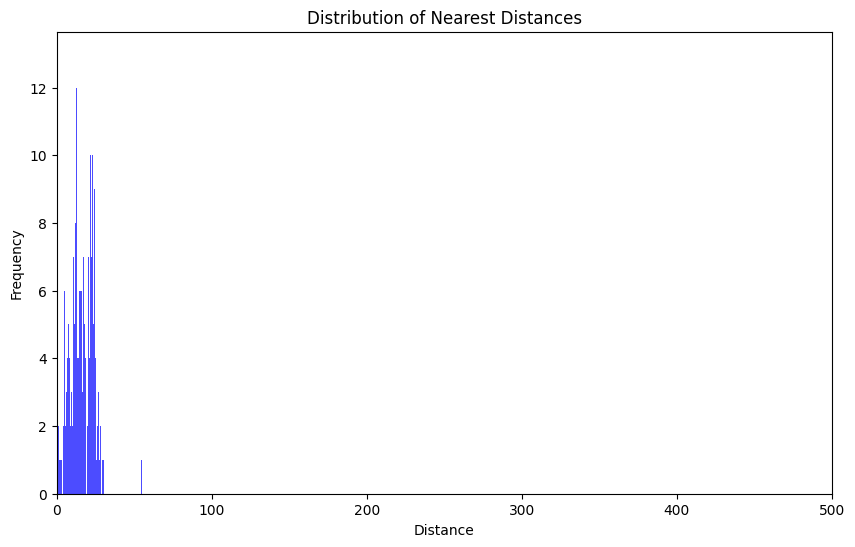

In [23]:
# 绘制最近距离的分布
plt.figure(figsize=(10, 6))
plt.hist(nearest_distances, bins=300, color='blue', alpha=0.7)
plt.title('Distribution of Nearest Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

In [24]:
import pandas as pd
mapping_mouse=pd.DataFrame(nearest_indices)
mapping_mouse.columns=['target_index']
mapping_mouse['dist']=nearest_distances
mapping_mouse['ori_index']=[i for i in range(len(nearest_indices))]
mapping_mouse.to_csv('/home/qyyuan/project/ST_GRN/TESLA/tutorial/results/mapping_SCC.txt',sep='\t')

# mapping 6 cluster

In [22]:
import pandas as pd

# 读取文件
# 完整的表格文件
full_table_path = "/home/zzhang/SPADE/SpaGCN/tutorial/sample_results/scc_domian_6.txt"
# 包含target_index的文件

# 读取数据
full_df = pd.read_csv(full_table_path, sep='\t',index_col=0)  # 如果是制表符分隔

In [11]:
import scanpy as sc
adata_ST_Ori=sc.read('/home/qyyuan/project/ST_GRN/data/SCC/adata_SCC_ST.h5ad')
points1=adata_ST_Ori.obs[['pixel_x','pixel_y']].to_numpy()
df=adata_ST_Ori.obs[['pixel_x','pixel_y']]

/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


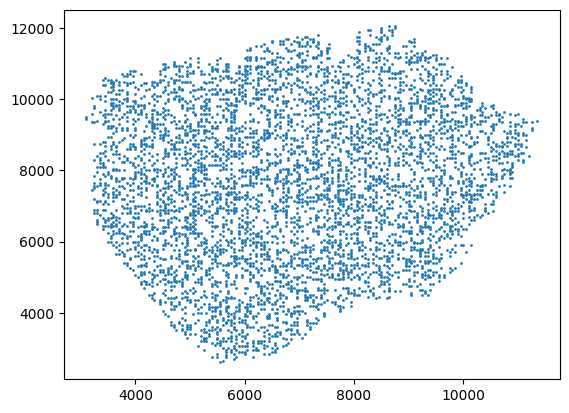

In [14]:
points2=full_df[['y','x']].to_numpy()
df=full_df[['x','y']]
import matplotlib.pyplot as plt
plt.scatter(df['y'], df['x'], s=1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def find_nearest_rows_vectorized(points1, points2):
    """
    向量化版本的最近邻搜索，效率更高
    """
    if points1.shape[1] != 2 or points2.shape[1] != 2:
        raise ValueError("两个矩阵都必须是N*2的形状")
    # 使用广播计算所有点对之间的距离
    # 扩展维度以便广播计算
    points1_expanded = points1[:, np.newaxis, :]  # 形状: (N, 1, 2)
    points2_expanded = points2[np.newaxis, :, :]  # 形状: (1, M, 2)
    # 计算平方距离（避免开方计算，因为argmin结果相同）
    squared_distances = np.sum((points1_expanded - points2_expanded) ** 2, axis=2)  
    # 找到每个点在points2中的最近邻索引
    nearest_indices = np.argmin(squared_distances, axis=1)
    # 计算最小距离
    nearest_distances = np.sqrt(np.min(squared_distances, axis=1))
    return nearest_indices, nearest_distances

# 示例数据

# 调用函数获取最近邻和最近距离
nearest_indices, nearest_distances = find_nearest_rows_vectorized(points1, points2)
full_df=full_df.reset_index()


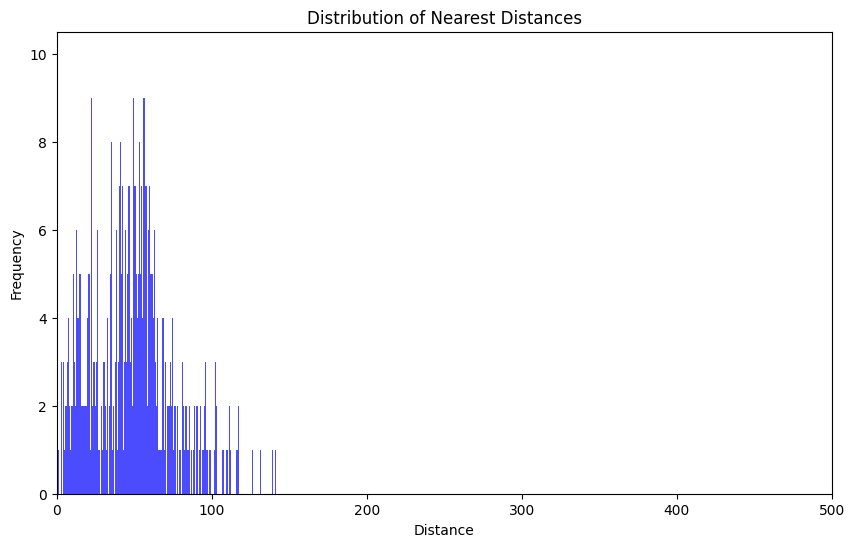

In [16]:
# 绘制最近距离的分布
plt.figure(figsize=(10, 6))
plt.hist(nearest_distances, bins=300, color='blue', alpha=0.7)
plt.title('Distribution of Nearest Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

In [25]:
import pandas as pd
mapping_mouse=pd.DataFrame(nearest_indices)
mapping_mouse.columns=['target_index']
mapping_mouse['dist']=nearest_distances
mapping_mouse['ori_index']=[i for i in range(len(nearest_indices))]
extracted_rows = full_df.iloc[nearest_indices].reset_index(drop=True)



In [27]:
merged_df = pd.concat([mapping_mouse, extracted_rows], axis=1)

In [28]:
merged_df.to_csv('/home/qyyuan/project/ST_GRN/TESLA/tutorial/results/mapping_SCC_cluster6.txt',sep='\t')

## Mouse Brain

In [25]:
import scanpy as sc
adata_ST1=sc.read_h5ad('/home/qyyuan/project/ST_GRN/TESLA/tutorial/results/enhanced_exp1.h5ad')
adata_ST_Ori=sc.read('/home/qyyuan/project/ST_GRN/data/mouse_anterior/adata_ST.h5ad')

/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
points1=adata_ST_Ori.obs[['pixel_x','pixel_y']].to_numpy()
df=adata_ST_Ori.obs[['pixel_x','pixel_y']]

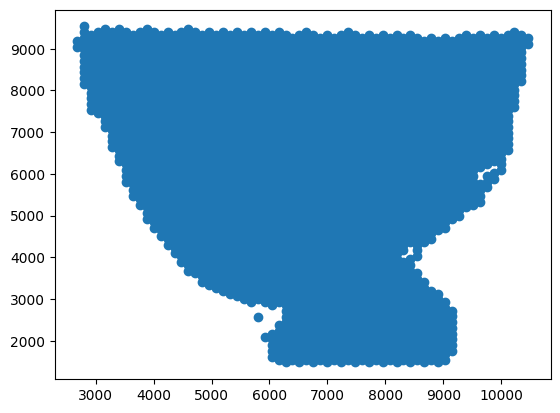

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['pixel_x'], df['pixel_y'])
plt.show()

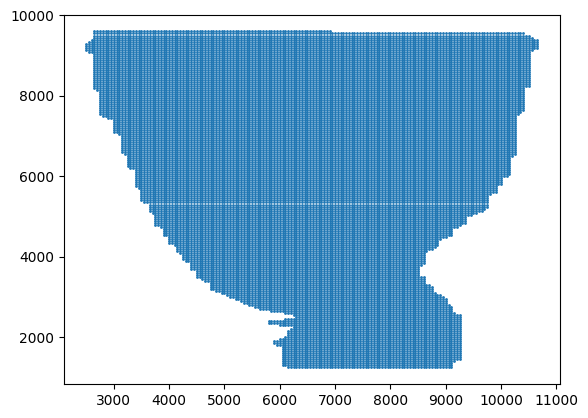

In [ ]:
points2=adata_ST1.obs[['x','y']].to_numpy()
df=adata_ST1.obs[['x','y']]
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], s=1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def find_nearest_rows_vectorized(points1, points2):
    """
    向量化版本的最近邻搜索，效率更高
    """
    if points1.shape[1] != 2 or points2.shape[1] != 2:
        raise ValueError("两个矩阵都必须是N*2的形状")
    # 使用广播计算所有点对之间的距离
    # 扩展维度以便广播计算
    points1_expanded = points1[:, np.newaxis, :]  # 形状: (N, 1, 2)
    points2_expanded = points2[np.newaxis, :, :]  # 形状: (1, M, 2)
    # 计算平方距离（避免开方计算，因为argmin结果相同）
    squared_distances = np.sum((points1_expanded - points2_expanded) ** 2, axis=2)  
    # 找到每个点在points2中的最近邻索引
    nearest_indices = np.argmin(squared_distances, axis=1)
    # 计算最小距离
    nearest_distances = np.sqrt(np.min(squared_distances, axis=1))
    return nearest_indices, nearest_distances

# 示例数据
# 调用函数获取最近邻和最近距离
nearest_indices, nearest_distances = find_nearest_rows_vectorized(points1, points2)

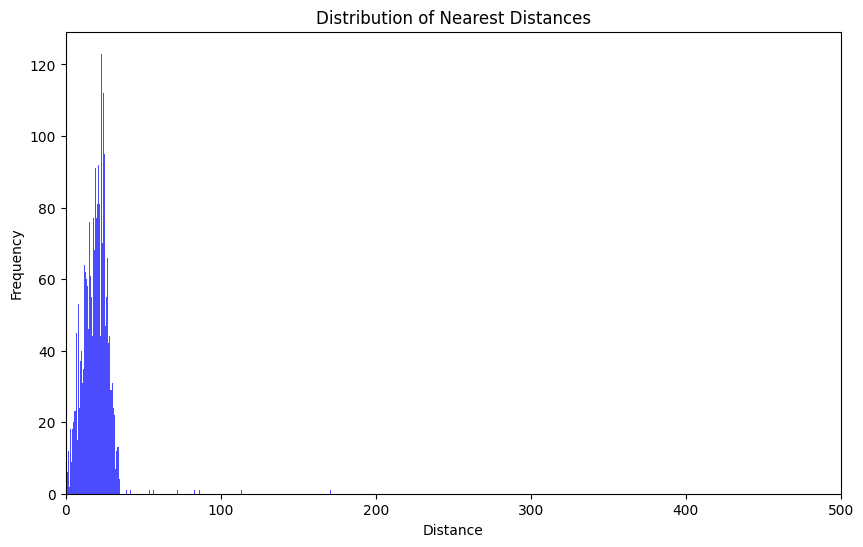

In [9]:
# 绘制最近距离的分布
plt.figure(figsize=(10, 6))
plt.hist(nearest_distances, bins=300, color='blue', alpha=0.7)
plt.title('Distribution of Nearest Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

In [11]:
import pandas as pd
mapping_mouse=pd.DataFrame(nearest_indices)
mapping_mouse.columns=['target_index']
mapping_mouse['dist']=nearest_distances
mapping_mouse['ori_index']=[i for i in range(len(nearest_indices))]

In [12]:
mapping_mouse.to_csv('/home/qyyuan/project/ST_GRN/TESLA/tutorial/results/mapping_mouse.txt',sep='\t')

## PDAC

In [42]:
import scanpy as sc
adata_ST1=sc.read_h5ad('/home/qyyuan/project/ST_GRN/TESLA/tutorial/results/enhanced_exp_PDAC.h5ad')
adata_ST_Ori=sc.read('/home/qyyuan/project/ST_GRN/data/PDAC/adata_PDAC_ST.h5ad')
adata_ST_Ori.obs[['pixel_x','pixel_y']] = adata_ST_Ori.obsm['spatial']*200
adata_ST_Ori.obs['pixel_x'] = 7500 - adata_ST_Ori.obs['pixel_x']
adata_ST_Ori.obs['pixel_y'] = 1000 + adata_ST_Ori.obs['pixel_y']

/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/qyyuan/.conda/envs/STALocator-zzqyy/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [43]:
points1=adata_ST_Ori.obs[['pixel_x','pixel_y']].to_numpy()
df=adata_ST_Ori.obs[['pixel_x','pixel_y']]

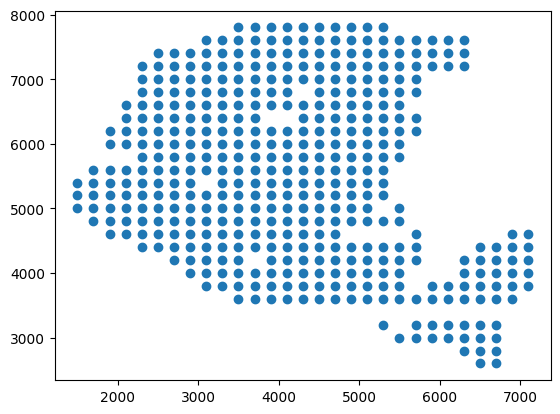

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df['pixel_x'], df['pixel_y'])
plt.show()

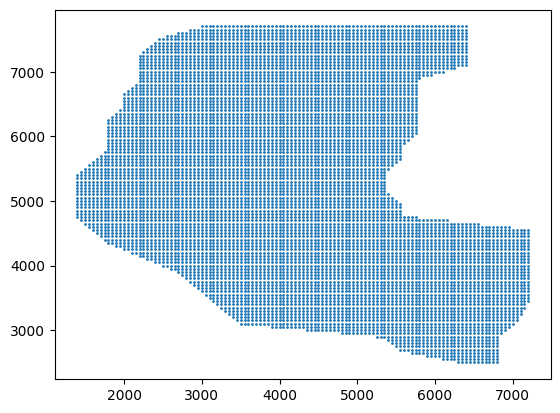

In [45]:
points2=adata_ST1.obs[['x','y']].to_numpy()
df=adata_ST1.obs[['x','y']]
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], s=1)
plt.show()

In [49]:
nearest_indices, nearest_distances = find_nearest_rows_vectorized(points1, points2)

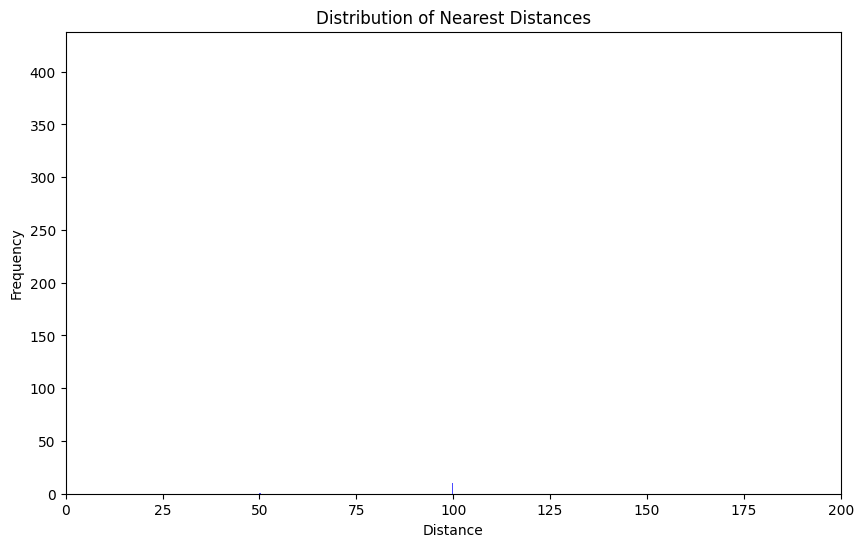

In [51]:
# 绘制最近距离的分布
plt.figure(figsize=(10, 6))
plt.hist(nearest_distances, bins=300, color='blue', alpha=0.7)
plt.title('Distribution of Nearest Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.show()

In [52]:
import pandas as pd
mapping_mouse=pd.DataFrame(nearest_indices)
mapping_mouse.columns=['target_index']
mapping_mouse['dist']=nearest_distances
mapping_mouse['ori_index']=[i for i in range(len(nearest_indices))]

In [53]:
mapping_mouse.to_csv('/home/qyyuan/project/ST_GRN/TESLA/tutorial/results/mapping_PDAC.txt',sep='\t')

In [4]:

mapping_df = pd.read_csv(mapping_path, sep='\t')   # 如果是制表符分隔

# 显示数据基本信息，确认读取正确
print("完整表格形状:", full_df.shape)
print("完整表格列名:", full_df.columns.tolist())
print("\n映射表格形状:", mapping_df.shape)
print("映射表格列名:", mapping_df.columns.tolist())



完整表格形状: (5000, 12)
完整表格列名: ['x', 'y', 'color', 'z', 'CD151', 'x_array', 'y_array', 'x_pixel', 'y_pixel', 'n_counts', 'pred', 'refined_pred']

映射表格形状: (666, 4)
映射表格列名: ['Unnamed: 0', 'target_index', 'dist', 'ori_index']


In [8]:
full_df

,x,y,color,z,CD151,x_array,y_array,x_pixel,y_pixel,n_counts,pred,refined_pred
7760,6850,7350,157.660893,-1001.645198,1.212193,6850,7350,6850,7350,5133.8594,0,0
5157,5900,5700,131.433166,-2383.178557,0.907866,5900,5700,5900,5700,4711.6514,1,1
10818,7850,9600,182.462336,304.759343,0.654688,7850,9600,7850,9600,2007.3618,3,3
7738,6850,6250,134.480439,-2222.664836,0.205531,6850,6250,6850,6250,2695.2654,2,2
15310,9300,8050,186.386338,511.454345,0.311305,9300,8050,9300,8050,1395.5230,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13155,8600,9650,164.143737,-660.164354,0.342248,8600,9650,8600,9650,972.3794,7,7
9862,7550,7700,180.115877,181.160709,0.941928,7550,7700,7550,7700,4508.4395,0,0
9158,7300,10600,232.614696,2946.511679,0.117630,7300,10600,7300,10600,600.8194,3,3
15328,9300,8950,203.163580,1395.187784,0.475869,9300,8950,9300,8950,1614.5852,0,0


In [6]:
# 根据target_index从完整表格中提取对应的行
# 假设完整表格的第一列是索引列

# 合并两个表格
# 横向合并，按行对应
merged_df = pd.concat([mapping_df, extracted_rows], axis=1)



IndexError: positional indexers are out-of-bounds

In [ ]:
# 保存结果
output_path = "./merged_results.txt"
merged_df.to_csv(output_path, sep='\t', index=False)

print(f"\n合并完成！结果已保存到: {output_path}")
print("合并后的表格形状:", merged_df.shape)
print("合并后的表格列名:", merged_df.columns.tolist())

# 显示前几行结果
print("\n合并结果的前5行:")
print(merged_df.head())